In [49]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

In [50]:
df=pd.read_csv("C:\\Users\\saras\\Desktop\\Kaggle datsets\\diamonds.csv")
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [51]:
df.shape

(53940, 11)

In [52]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [53]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [54]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [55]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [56]:
categorical_cols=['cut','color','clarity']

In [57]:
for i in categorical_cols:
    print("Value counts for " + i + ":")
    print(df[i].value_counts())
    print()

Value counts for cut:
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

Value counts for color:
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

Value counts for clarity:
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64



In [58]:
zero_entries = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
zero_entries

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [59]:
df = df[df['z'] != 0]

In [60]:
df.describe() #all good now 

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [61]:
df = df.drop('Unnamed: 0', axis=1)

In [62]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [63]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


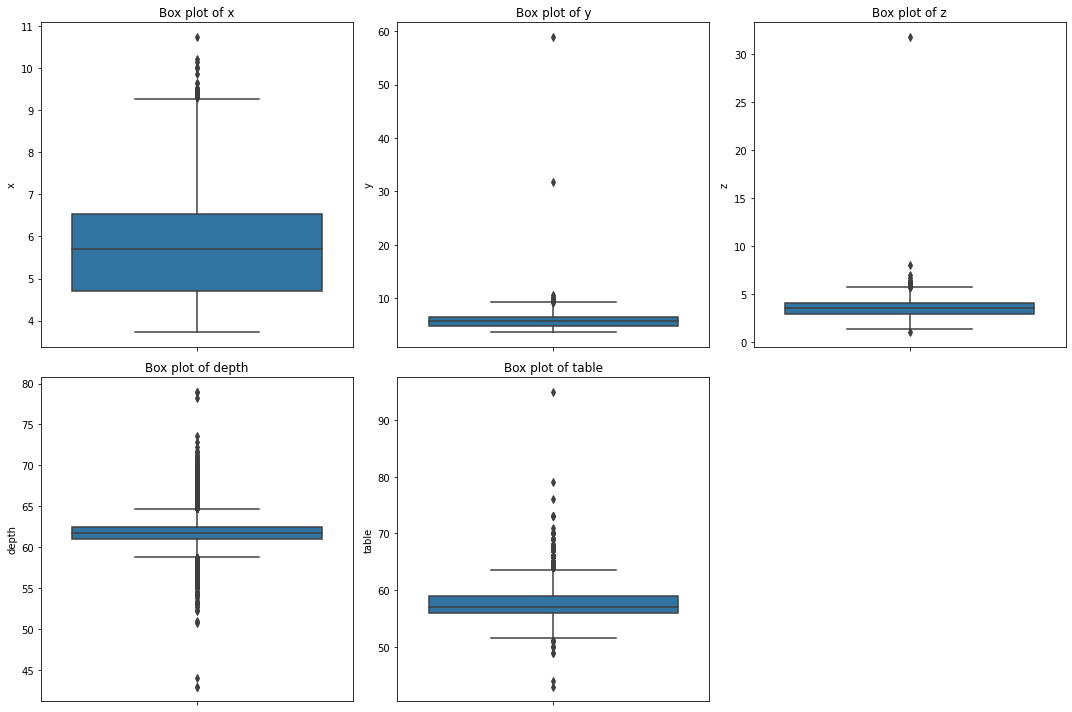

In [64]:

numerical_columns = ['x', 'y', 'z', 'depth', 'table']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [65]:
def remove_outliers(df):
    # Copy the DataFrame to avoid modifying the original
    df_cleaned = df.copy()
    
    # Loop through each numerical column
    for i in df_cleaned.select_dtypes(include=[np.number]).columns:
        Q1 = df_cleaned[i].quantile(0.25)
        Q3 = df_cleaned[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df_cleaned = df_cleaned[(df_cleaned[i] >= lower_bound) & (df_cleaned[i] <= upper_bound)]

    return df_cleaned

# Remove outliers
df_filtered = remove_outliers(df)

# Display the shape of the original and filtered DataFrame to compare
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)

Original DataFrame shape: (53920, 10)
Filtered DataFrame shape: (46530, 10)


In [66]:
df2=df_filtered
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


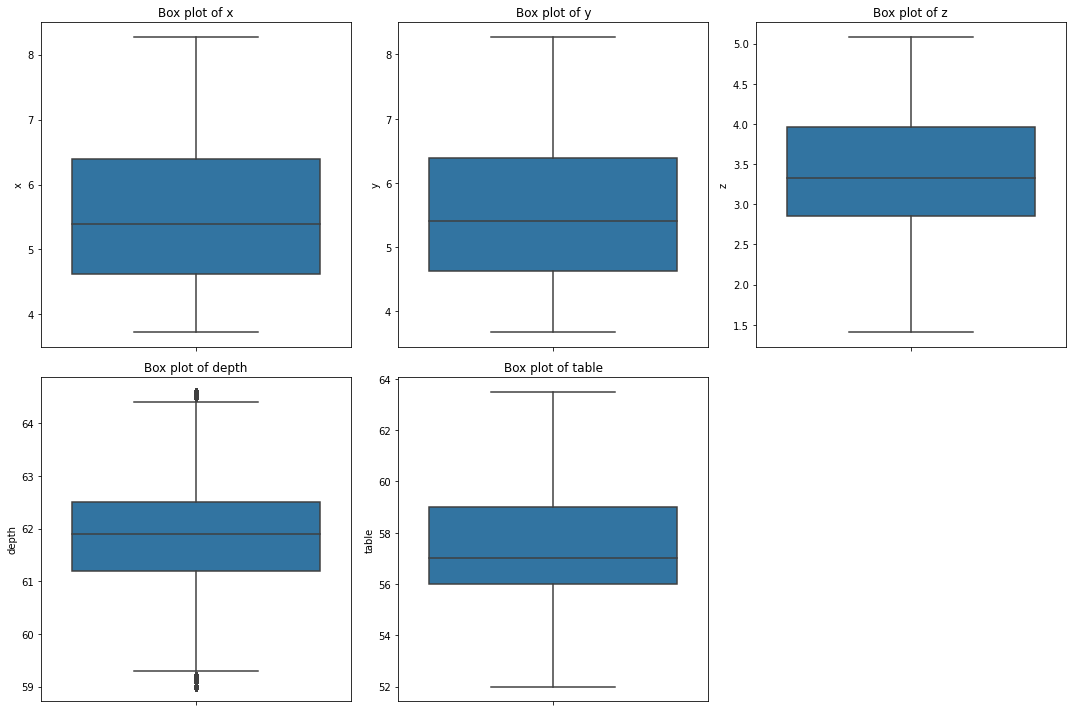

In [67]:

numerical_columns = ['x', 'y', 'z', 'depth', 'table']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df2[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [68]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["cut","color","clarity"]
le = LabelEncoder()
for i in categorical_cols:
    df2[i] = le.fit_transform(df2[i])
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


In [69]:
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


In [70]:
X=df2.drop('price',axis=1)
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48


In [71]:
y=df2['price']
y.head()

0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64

<AxesSubplot:>

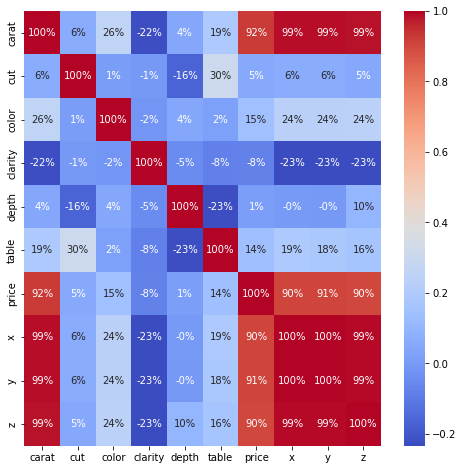

In [72]:
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(),annot=True,fmt='.0%',cmap='coolwarm')

In [74]:
import tensorflow as tf

In [75]:
import tensorflow as tf
import numpy as np

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)


TensorFlow version: 2.17.0
NumPy version: 1.26.4


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [81]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
11705,-0.989573,0.400065,-0.908117,-1.093072,-2.326766,0.379647,-1.007485,-0.977216,-1.178627
52900,0.087894,-0.660620,0.277917,0.643428,0.644961,-0.613165,0.267475,0.222133,0.310700
14596,1.496889,0.400065,1.463951,0.643428,-1.583834,0.876054,1.552801,1.484057,1.314741
7064,-1.017200,1.460750,0.277917,0.643428,-2.326766,1.868867,-1.069678,-1.060649,-1.245563
47336,-1.293474,1.460750,-0.908117,1.222262,-0.376570,0.876054,-1.650148,-1.602963,-1.647179


In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  r2_score

In [84]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('mae',mae)
r2 = r2_score(y_test, y_pred)
print('r2',r2)

mae 572.9649569138658
r2 0.8928787602909746


In [85]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [86]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"R-squared: {r2:.3f}")

Test MAE: 194.1669
R-squared: 0.983


In [87]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=64)

Epoch 1/30
466/466 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 15483984.0000 - mae: 2985.2444 - val_loss: 15789800.0000 - val_mae: 3022.0886
Epoch 2/30
466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 15297998.0000 - mae: 2969.6794 - val_loss: 15188136.0000 - val_mae: 2972.1628
Epoch 3/30
466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 14353087.0000 - mae: 2889.6028 - val_loss: 14373815.0000 - val_mae: 2895.6924
Epoch 4/30
466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13979675.0000 - mae: 2870.6812 - val_loss: 13237617.0000 - val_mae: 2780.3972
Epoch 5/30
466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12805893.0000 - mae: 2750.2087 - val_loss: 12090593.0000 - val_mae: 2678.2971
Epoch 6/30
466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 11445734.0000 - mae: 2612.5906 - val_loss: 10781548.0000 - val_mae: 2555.7046
Epoch 7/30
466/466 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10388918.0000 - mae: 2499.7583 - val_loss: 9556738.0000 - val_mae: 2412.8987
Epoch 8/30
466/466 ━━━━━━━━━━━━━━━━

In [88]:
test_loss, test_mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'Test MAE: {test_mae}')
print(f"R-squared: {r2:.3f}")

291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 251295.2500 - mae: 303.4755
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test MAE: 301.63671875
R-squared: 0.963
